Deep Learning Practical Assignment 3 A - Plant Leaves Disease Prediction

Name : Ashish Ramesh Walke | Batch : B8 | Roll no. : 4272

**From original plant dataset tomato directory selected for training and testing with only 200 images from each disease. There are 3 diseases and 1 healthy. Total 4 directories selected each for training and testing so total 1600 images considered.**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import numpy as np

Dataset is stored on google drive with Train and Test folder.

In [2]:
train_dir = r'Tomato_Only\Train'
test_dir = r'Tomato_Only\Test'

In [3]:
img_size = 224
batch_size = 32

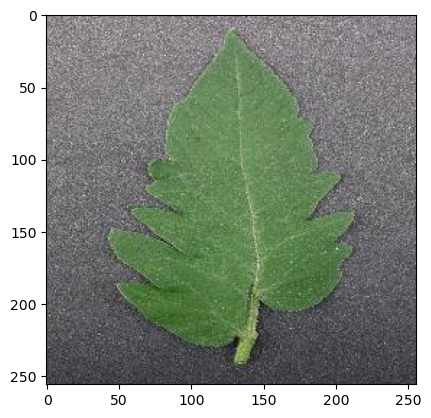

In [4]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('Tomato_Only/Train/Tomato___healthy/Th.JPG')

# displaying the image
plt.imshow(testImage)

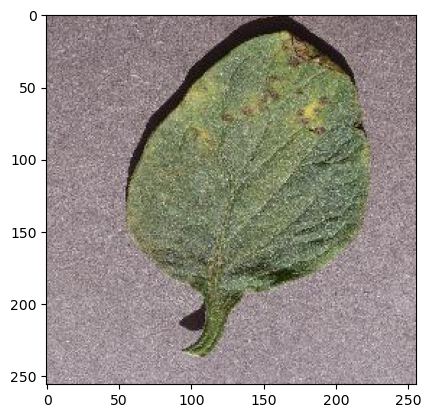

In [5]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('Tomato_Only/Train/Tomato___Target_Spot/d9a0ed7a-8257-4002-b0b8-fa0c5f17028d___Com.G_TgS_FL 9788.JPG')

# displaying the image
plt.imshow(testImage)


**Image Preprocessing**

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical')

Found 800 images belonging to 4 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical')

Found 800 images belonging to 4 classes.


**Categories are identified**

In [8]:
class_names=list(train_generator.class_indices)
class_names

['Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [9]:
class_names=list(test_generator.class_indices)
class_names

['Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

**Model Building**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization

In [11]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
model = Sequential()
model.add((Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size, 3))))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(64, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(64, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(128, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Flatten()))
model.add((Dense(128, activation='relu')))
model.add((Dropout(0.2)))
model.add((Dense(64, activation='relu')))
model.add((Dense(train_generator.num_classes, activation='softmax')))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
25/25 [==============================] - 67s 3s/step - loss: 1.5235 - accuracy: 0.7375 - val_loss: 5.8747 - val_accuracy: 0.2500
Epoch 2/50
25/25 [==============================] - 56s 2s/step - loss: 0.3037 - accuracy: 0.9200 - val_loss: 15.6254 - val_accuracy: 0.2500
Epoch 3/50
25/25 [==============================] - 57s 2s/step - loss: 0.3010 - accuracy: 0.9375 - val_loss: 16.2961 - val_accuracy: 0.2500
Epoch 4/50
25/25 [==============================] - 53s 2s/step - loss: 0.1384 - accuracy: 0.9600 - val_loss: 18.2263 - val_accuracy: 0.2500
Epoch 5/50
25/25 [==============================] - 51s 2s/step - loss: 0.1564 - accuracy: 0.9613 - val_loss: 23.6804 - val_accuracy: 0.2500
Epoch 6/50
25/25 [==============================] - 50s 2s/step - loss: 0.1062 - accuracy: 0.9725 - val_loss: 34.1873 - val_accuracy: 0.2500
Epoch 7/50
25/25 [==============================] - 53s 2s/step - loss: 0.1900 - accuracy: 0.9600 - val_loss: 34.4762 - val_accuracy: 0.2500
Epoch 8/50
25/

In [15]:
loss, accuracy = model.evaluate(test_generator)
print("Loss :",loss)
print("Accuracy (Test Data) :",accuracy*100)

25/25 [==============================] - 10s 405ms/step - loss: 1.9629 - accuracy: 0.8450
Loss : 1.962868094444275
Accuracy (Test Data) : 84.50000286102295


**Image is selected and predicted.**

In [18]:
img_path =r'Tomato_Only/Train/Tomato___Target_Spot/c6a1dc1f-e0fd-40df-8726-5db2b0be7150___Com.G_TgS_FL 0736.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255

In [19]:
print(img_array.shape)

(1, 224, 224, 3)


In [20]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 330ms/step


In [21]:
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

Predicted class: Tomato___Tomato_mosaic_virus


In [22]:
img_path =r'Tomato_Only/Train/Tomato___Tomato_mosaic_virus/dcb74f2b-c523-4147-b9ce-690800411273___PSU_CG 2154_270deg.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

1/1 [==============================] - 0s 49ms/step
Predicted class: Tomato___Tomato_mosaic_virus


In [23]:
img_path =r'Tomato_Only/Test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/bf09ead6-7015-4942-bbf7-e509193885ab___YLCV_NREC 2830.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

1/1 [==============================] - 0s 60ms/step
Predicted class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
